In [169]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [170]:
np.random.seed(0)

In [171]:
data = pd.read_csv("D://datasetfilm.csv")
data.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
1,22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
2,3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0
3,300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
4,A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0


In [172]:
#Pre-processing
#mengecek apakah ada data yang bernilai NUll & NAs(True)
print ("Bentuk dataset sebelum di cleaning: ", data.size)
data.isna().any()

Bentuk dataset sebelum di cleaning:  3248


Movie                  True
Year                   True
Ratings                True
Genre                  True
Gross                  True
Budget                 True
Screens                True
Sequel                 True
Sentiment              True
Views                  True
Likes                  True
Dislikes               True
Comments               True
Aggregate Followers    True
dtype: bool

In [173]:
#Pre-processing
#menghapus NULL & NAs di Defaulted
data[[ 'Movie','Year','Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel','Sentiment', 'Views', 'Dislikes', 'Comments', 
      'Aggregate Followers']] = data[[ 'Movie','Year','Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel', 'Sentiment', 
                                      'Views', 'Dislikes', 'Comments', 'Aggregate Followers']]

data = data.dropna()
data = data.reset_index(drop=True)
print ("Bentuk dataset setelah di cleaning: ", data.size)
data.isna().any()

Bentuk dataset setelah di cleaning:  2618


Movie                  False
Year                   False
Ratings                False
Genre                  False
Gross                  False
Budget                 False
Screens                False
Sequel                 False
Sentiment              False
Views                  False
Likes                  False
Dislikes               False
Comments               False
Aggregate Followers    False
dtype: bool

In [174]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

C:\Users\L\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\L\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.63719309, -0.12678709,  0.66890914, ..., -0.2235617 ,
        -0.34389858, -0.40827536],
       [-0.63719309,  0.67691415, -1.02799409, ..., -0.50106408,
        -0.47362538,  1.85523503],
       [-0.63719309, -0.22724975, -1.02799409, ..., -0.52164804,
        -0.51369654, -0.5366686 ],
       ...,
       [ 1.56938299, -0.83002568, -0.5431646 , ..., -0.0901471 ,
         0.18423364,  0.12061612],
       [ 1.56938299,  0.87783946, -0.5431646 , ..., -0.52622226,
        -0.52320984, -0.60802058],
       [ 1.56938299, -0.12678709, -0.5431646 , ..., -0.52698463,
        -0.51513795, -0.39456933]])

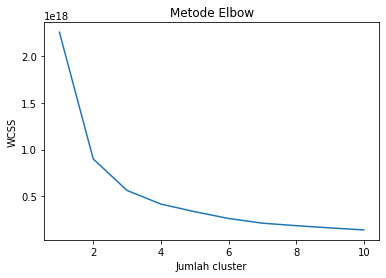

In [175]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', n_init = 12)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

In [176]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',  n_init = 12)
y_kmeans = k_means.fit_predict(X)
print(y_kmeans)

[0 2 0 2 0 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 2 0 0 0 0 2 0 0 2 0
 0 1 2 1 0 2 0 2 0 0 2 0 2 0 0 0 2 0 0 0 1 0 0 0 2 0 0 2 2 0 2 2 0 2 0 2 0
 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 1 0 0 0 2 0 2 0 0 0 1 0 0 1 0 0 0 1 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 1 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [158]:
data["Cluster"] = y_kmeans
data.head(5)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Cluster
0,13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0,0
1,22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0,2
2,3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0,0
3,300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0,2
4,A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0,0


In [159]:
data.groupby('Cluster').mean()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Cluster,,,,,,,,,,,,,
0,2014.254098,6.186885,5.959016,2.820966e+07,2.377949e+07,1761.721311,1.237705,3.000000,3.330247e+06,9380.704918,520.524590,1275.991803,2.357646e+06
1,2014.277778,7.377778,2.944444,3.038333e+08,1.643222e+08,4019.777778,2.666667,2.944444,2.464435e+06,8966.944444,348.388889,1240.222222,5.420202e+06
2,2014.382979,6.682979,4.255319,1.193489e+08,8.957447e+07,3174.893617,1.489362,2.404255,6.053563e+06,23915.340426,1373.127660,3489.659574,4.319742e+06


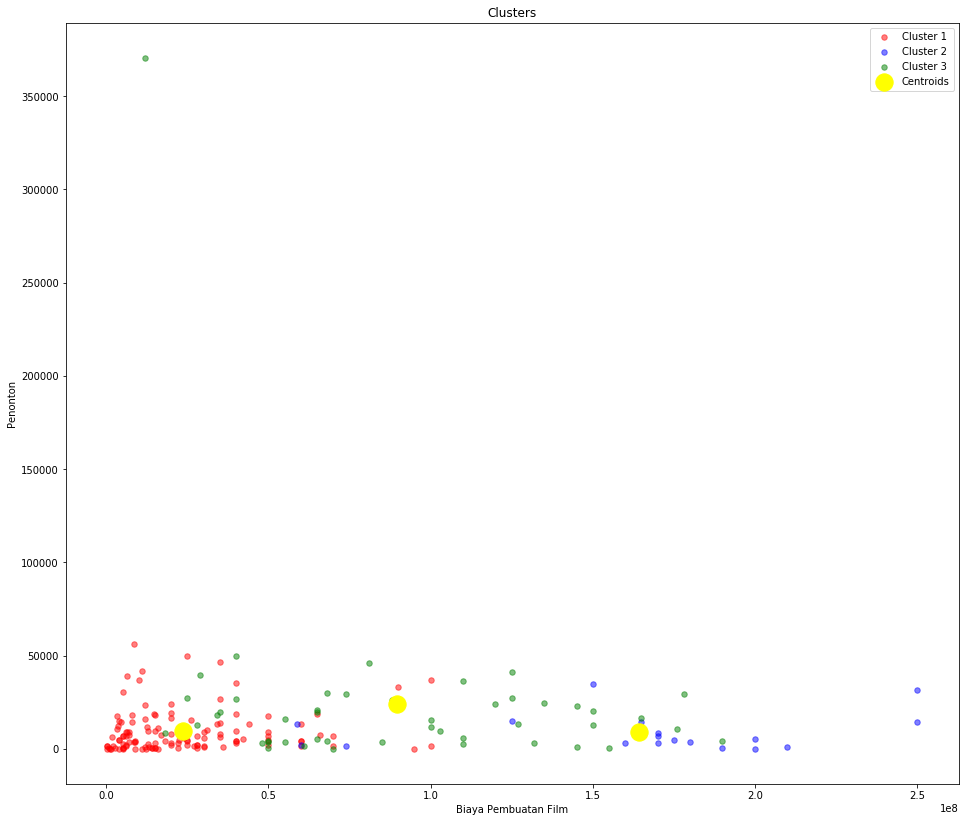

In [168]:
# Visualisasi hasil clusters
fig = plt.figure(figsize=(16, 14))
plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 9], s = 30, c = 'red', label = 'Cluster 1', alpha=0.5)
plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 9], s = 30, c = 'blue', label = 'Cluster 2', alpha=0.5)
plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 9], s = 30, c = 'green', label = 'Cluster 3', alpha=0.5)
plt.scatter(k_means.cluster_centers_[:,4], k_means.cluster_centers_[:,9], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Biaya Pembuatan Film')
plt.ylabel('Penonton')
plt.legend()
plt.show()